In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf


In [14]:
x = [1, 2, 3, 4, 5, 6]
y = [1, 4, 9, 16, 25, 36]

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=200, verbose=0)

In [45]:
model.predict([7])

array([[36.44951]], dtype=float32)

In [16]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [17]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [18]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

784

### Initialize the TFLite Interpreter

In [19]:
# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [20]:
# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
# Test the TFL Model for random input data
input_shape = input_details[0]['shape']
print(f"Input Shape: {input_shape.shape}")
inputs, outputs = [], []

for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

Input Shape: (2,)


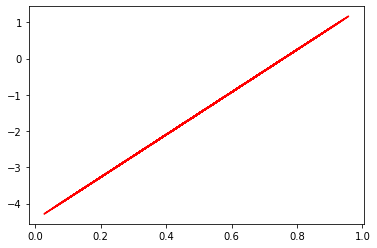

In [22]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()